In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### We download the Dogs and Cats dataset(it va mushuklar datasetini kompyuterimiz xotirasiga yuklaymiz)

In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  786M    0  206k    0     0   459k      0  0:29:13 --:--:--  0:29:13  459k
  0  786M    0 4683k    0     0  3207k      0  0:04:11  0:00:01  0:04:10 3210k
  1  786M    1 10.9M    0     0  4586k      0  0:02:55  0:00:02  0:02:53 4587k
  2  786M    2 16.6M    0     0  4955k      0  0:02:42  0:00:03  0:02:39 4956k
  2  786M    2 22.3M    0     0  5085k      0  0:02:38  0:00:04  0:02:34 5085k
  3  786M    3 27.9M    0     0  5236k      0  0:02:33  0:00:05  0:02:28 5665k
  4  786M    4 33.2M    0     0  5248k      0  0:02:33  0:00:06  0:02:27 5843k
  4  786M    4 38.3M    0     0  5269k      0  0:02:32  0:00:07  0:02:25 5604k
  5  786M    5 44.7M    0     0  5401k      0  0:02:29  0:00:08  0:02:21 5707k
  6  786M    6 50.3M    0     0  5449k      0  0:02

In [1]:
!dir

 Volume in drive D is 1TB HDD
 Volume Serial Number is C838-CEB9

 Directory of d:\Projects\AI\Hand-on Machine learning projects\Dog and Cat Classification

04/05/2022  02:48 AM    <DIR>          .
04/05/2022  02:48 AM    <DIR>          ..
04/05/2022  02:54 AM            15,129 catdogclassification.ipynb
02/10/2017  09:55 AM            35,545 MSR-LA - 3467.docx
02/10/2017  09:51 AM               104 readme[1].txt
               3 File(s)         50,778 bytes
               2 Dir(s)  931,558,252,544 bytes free


## Filter out corrupted images (Yaxshi kodlanmagan rasmlarni datasetimizdan olib tashlaymiz)

In [5]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("D:\Projects\AI\Hand-on Machine learning projects\PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1578 images


#### Generate Dataset ( Datasetni train qilish uchun tayyorlaymiz)

In [3]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\Projects\AI\Hand-on Machine learning projects\PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\Projects\AI\Hand-on Machine learning projects\PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


### Let's visualize the data (Ma'lumotlarni ko'raylik...)
Here are the first 9 images in the training dataset. As you can see, label 1 is 'dog' and label 0 is 'cat'.
(Bu yerda train qiladigan datasetimizdagi 9 ta rasm. label1 'it' va label 0 'mushuk' uchun.)

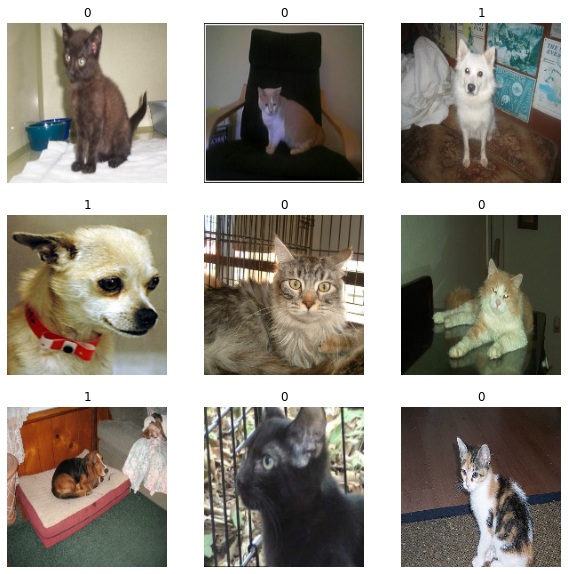

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")